In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=1.3)

In [2]:
joined_df = pd.read_csv("outputs/ResAMR_DrugZeroShot/ResMLP_zero_shot_AUPRC.csv")
joined_df

,dataset,drug,test_AUPRC,n_test_samples,n_resistant_test_samples
0,A,5-Fluorocytosine,0.048747,680,25
1,A,Amikacin,0.333421,17226,975
2,A,Amoxicillin,0.547678,629,136
3,A,Anidulafungin,0.760004,675,191
4,A,Azithromycin,0.276569,95,12
...,...,...,...,...,...
140,D,Tetracycline,0.219893,3046,299
141,D,Ticarcillin,0.779399,229,161
142,D,Tigecycline,0.049462,3068,2
143,D,Tobramycin,0.406031,325,12


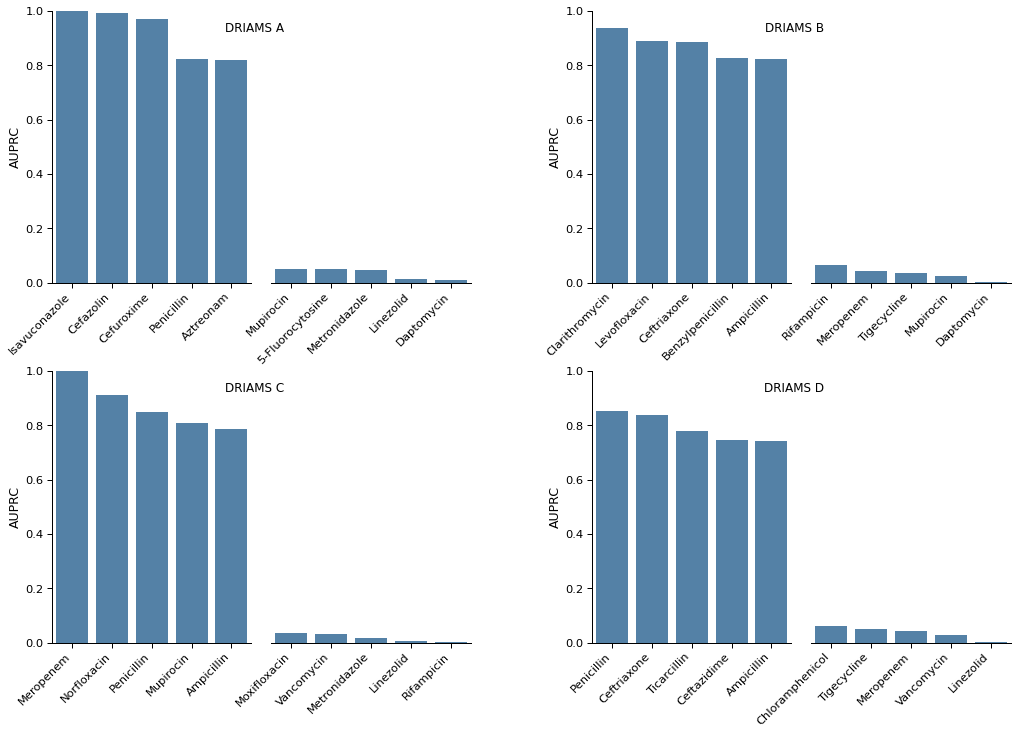

In [3]:
sel_metric = "test_AUPRC"

fig = plt.figure(figsize=(15, 10))


subfigs = fig.subfigures(nrows=2, ncols=2)
datasets = ["A", "B", "C", "D"]
for row, subfig in enumerate(subfigs.flatten()):
    dset = datasets[row]
    subfig.suptitle(f'DRIAMS {dset}', y=0.85)
    
    
    df = joined_df[joined_df["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    axs = subfig.subplots(nrows=1, ncols=2)
    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df.iloc[:5], y=sel_metric, x="drug", ax=axs[0], color="steelblue")
    sns.barplot(data=df.iloc[-5:], y=sel_metric, x="drug", ax=axs[1], color="steelblue")
    axs[0].set_ylabel("AUPRC")
    axs[0].set_xlabel("")
    axs[1].set_xlabel("")
    axs[0].set_ylim(0,1)
    axs[1].set_ylim(0,1)
    # sns.despine()
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    
    
    for label in axs[0].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    for label in axs[1].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    plt.subplots_adjust(hspace=0.9, wspace=0.1)

        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

if not os.path.exists("outputs/plots"):
    os.makedirs("outputs/plots", exist_ok=True)

fig.savefig("outputs/plots/drugs_zero_shot.pdf", bbox_inches="tight")
plt.show()


In [29]:
drug_sets = {}
long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
drugs_df = pd.read_csv("../processed_data/drug_fingerprints.csv", index_col=0)

long_table = long_table[long_table["drug"].isin(drugs_df.index)]

# for dset in datasets:
#     drug_sets[dset] = sorted(long_table[long_table["dataset"]==dset]["drug"].unique())
#     print(len(drug_sets[dset]))

drugs_list = sorted(long_table["drug"].unique())

In [32]:
"Isavuconazole" in long_table["drug"].values

True

In [33]:
long_table[long_table["drug"]=="Isavuconazole"]

,species,sample_id,drug,response,dataset
47035,Candida albicans,a345f4a9-53a2-4c42-9a48-4ac7e05eb197_MALDI1,Isavuconazole,1,A
137633,Aspergillus terreus,4a4af342-cabe-4d79-9502-ba0928c515e4_MALDI1,Isavuconazole,0,A
137638,Aspergillus terreus,f769c175-050c-4f17-a532-bc680901890d_MALDI1,Isavuconazole,0,A
235992,Aspergillus fumigatus,a50d5385-52e9-4c86-a675-ecfa3531a761_MALDI1,Isavuconazole,0,A
236076,Aspergillus fumigatus,e5d71821-bd0f-4174-af56-75fec8c50e83_MALDI1,Isavuconazole,0,A


In [27]:
drugs_df.index

Index(['5-Fluorocytosine', 'Amikacin', 'Amoxicillin', 'Amphotericin B',
       'Ampicillin', 'Anidulafungin', 'Azithromycin', 'Aztreonam',
       'Benzylpenicillin', 'Caspofungin', 'Cefazolin', 'Cefepime', 'Cefixime',
       'Cefotaxime', 'Cefoxitin', 'Cefpodoxime', 'Ceftazidime', 'Ceftobiprole',
       'Ceftriaxone', 'Cefuroxime', 'Chloramphenicol', 'Ciprofloxacin',
       'Clarithromycin', 'Clindamycin', 'Colistin', 'Cotrimoxazol',
       'Cotrimoxazole', 'Daptomycin', 'Doxycycline', 'Ertapenem',
       'Erythromycin', 'Fluconazole', 'Fosfomycin', 'Fusidic acid',
       'Gentamicin', 'Imipenem', 'Isavuconazole', 'Itraconazole',
       'Levofloxacin', 'Linezolid', 'Meropenem', 'Metronidazole', 'Micafungin',
       'Minocycline', 'Moxifloxacin', 'Mupirocin', 'Nitrofurantoin',
       'Norfloxacin', 'Novobiocin', 'Ofloxacin', 'Oxacillin', 'Penicillin',
       'Piperacillin', 'Polymyxin B', 'Posaconazole', 'Quinolones',
       'Rifampicin', 'Teicoplanin', 'Telithromycin', 'Tetracycline',


In [28]:
drugs_list

['5-Fluorocytosine',
 'Amikacin',
 'Amoxicillin',
 'Amphotericin B',
 'Ampicillin',
 'Anidulafungin',
 'Azithromycin',
 'Aztreonam',
 'Benzylpenicillin',
 'Caspofungin',
 'Cefazolin',
 'Cefepime',
 'Cefixime',
 'Cefotaxime',
 'Cefoxitin',
 'Cefpodoxime',
 'Ceftazidime',
 'Ceftobiprole',
 'Ceftriaxone',
 'Cefuroxime',
 'Chloramphenicol',
 'Ciprofloxacin',
 'Clarithromycin',
 'Clindamycin',
 'Colistin',
 'Cotrimoxazol',
 'Cotrimoxazole',
 'Daptomycin',
 'Doxycycline',
 'Ertapenem',
 'Erythromycin',
 'Fluconazole',
 'Fosfomycin',
 'Fusidic acid',
 'Gentamicin',
 'Imipenem',
 'Isavuconazole',
 'Itraconazole',
 'Levofloxacin',
 'Linezolid',
 'Meropenem',
 'Metronidazole',
 'Micafungin',
 'Minocycline',
 'Moxifloxacin',
 'Mupirocin',
 'Nitrofurantoin',
 'Norfloxacin',
 'Novobiocin',
 'Ofloxacin',
 'Oxacillin',
 'Penicillin',
 'Piperacillin',
 'Polymyxin B',
 'Posaconazole',
 'Quinolones',
 'Rifampicin',
 'Teicoplanin',
 'Telithromycin',
 'Tetracycline',
 'Ticarcillin',
 'Tigecycline',
 'Tobr

In [9]:
similarity = pd.read_csv("outputs/drugs_similarities/morgan_1024_fp_tanimoto_index.csv", index_col=0)
similarity = similarity[[c for c in similarity.columns if c in drugs_list]]
similarity = similarity.loc[[c for c in similarity.columns]]

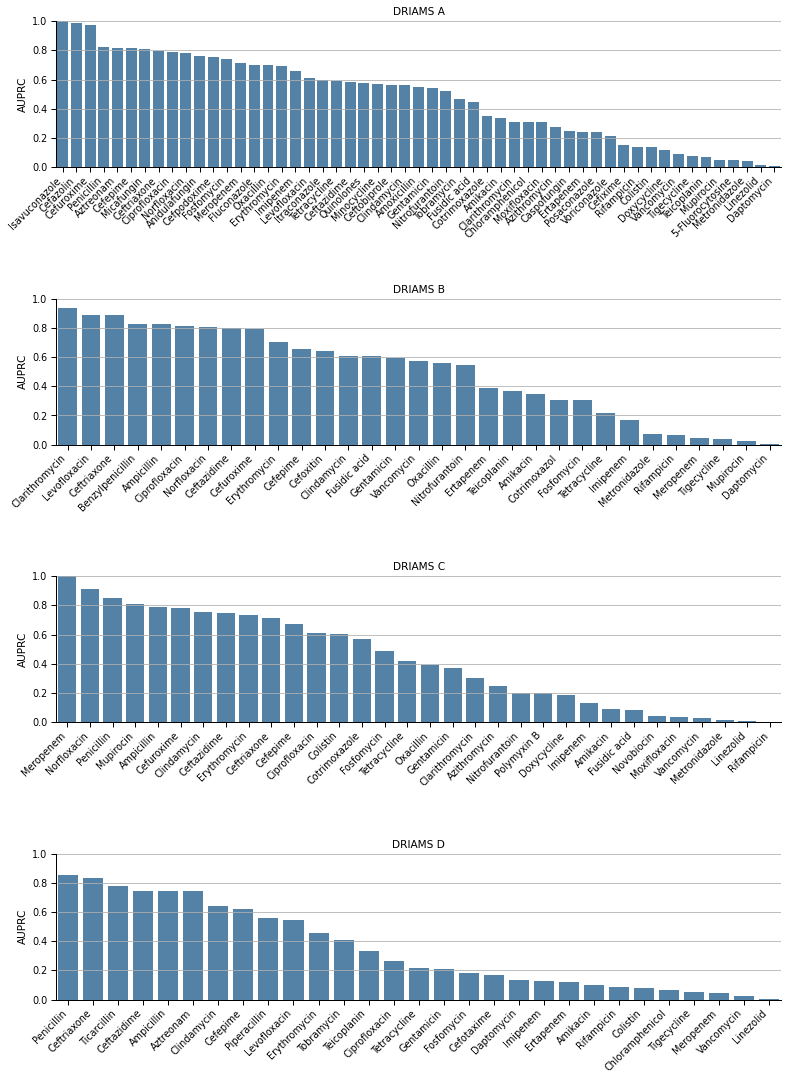

In [4]:
sel_metric = "test_AUPRC"

sns.set_context("paper", font_scale=1.1)
fig, axs = plt.subplots(4, 1, figsize=(13, 18))
for j, dataset in enumerate(["A", "B", "C", "D"]):

    df = joined_df[joined_df["dataset"]==dataset].sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=axs[j], color="steelblue")
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    axs[j].yaxis.grid(True) # Hide the horizontal gridlines
    axs[j].xaxis.grid(False)
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[j].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
plt.show()

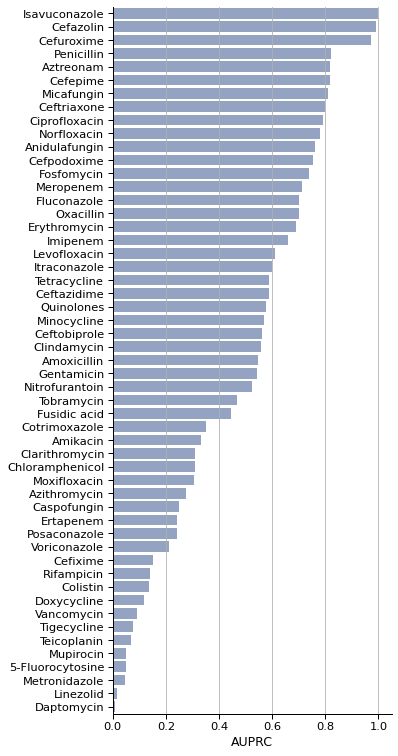

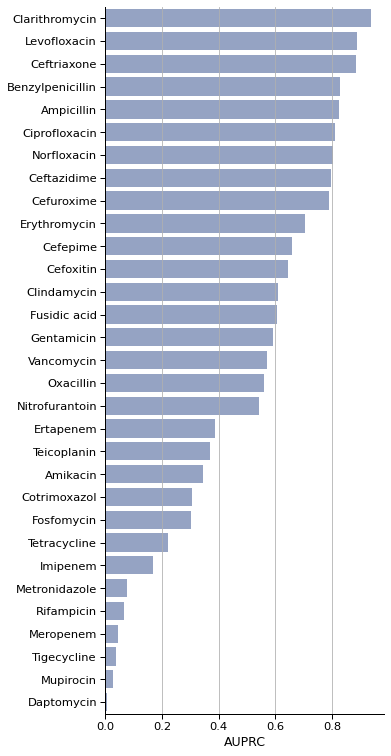

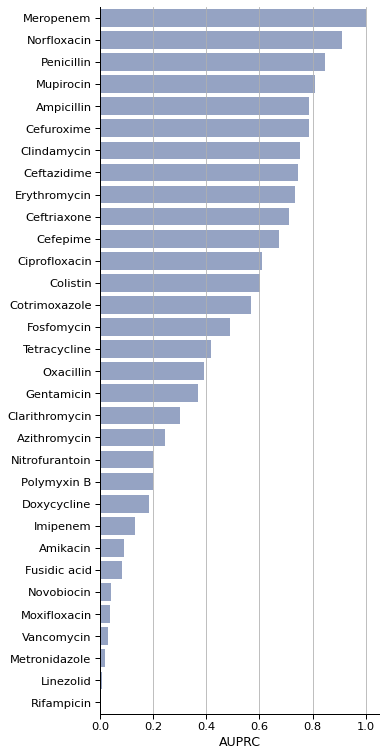

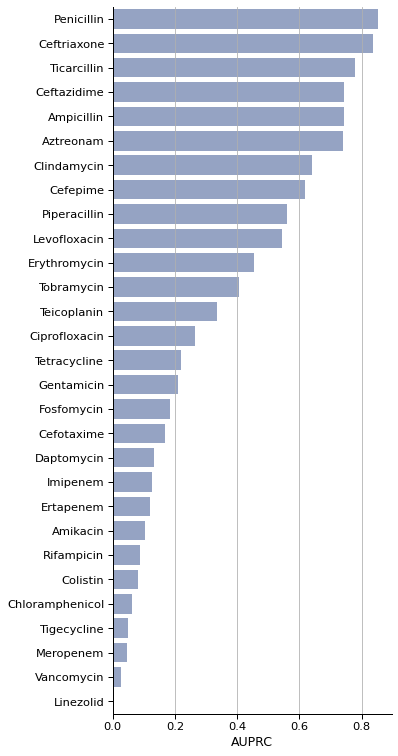

In [43]:
sel_metric = "test_AUPRC"
sns.set_context("paper", font_scale=1.3)

for j, dataset in enumerate(["A", "B", "C", "D"]):
    fig, ax = plt.subplots(figsize=(5, 13))
    ax.yaxis.grid(False) # Hide the horizontal gridlines
    ax.xaxis.grid(True)
    df = joined_df[joined_df["dataset"]==dataset].sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, x=sel_metric, y="drug", ax=ax, color=sns.color_palette("Set2")[2])
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    ax.set_xlabel("AUPRC")
    ax.set_ylabel("")

        
# plt.subplots_adjust(hspace=0.9, wspace=0.1)

# fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
    plt.show()
    fig.savefig("outputs/plots/drugs_zero_shot_full_DRIAMS-{}.pdf".format(dataset), bbox_inches="tight")

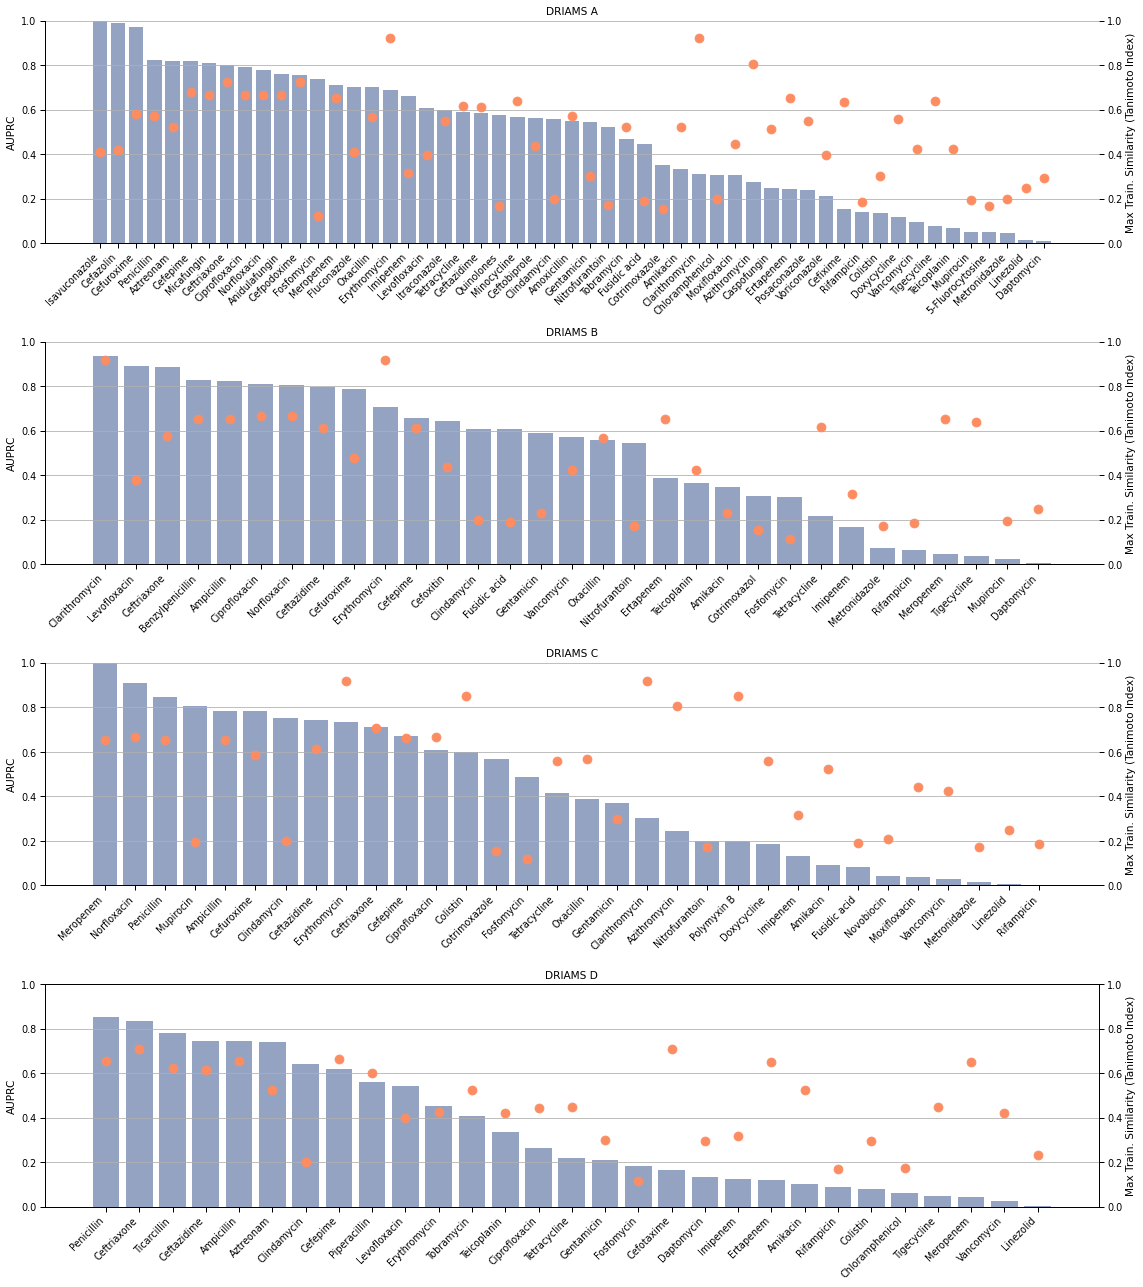

In [48]:
sel_metric = "test_AUPRC"

sns.set_context("paper", font_scale=1.1)
fig, axs = plt.subplots(4, 1, figsize=(16, 18))
for j, dataset in enumerate(["A", "B", "C", "D"]):

    
    dataset_drugs = sorted(long_table[long_table["dataset"]==dataset]["drug"].unique())
    sim_list = [d for d in similarity.columns if d in dataset_drugs]
    sim_df = similarity[sim_list]
    sim_df = sim_df.loc[sim_list]
    similarity_mat = sim_df.values - np.eye(len(sim_df))

    max_similarity = dict(zip(sim_df.columns, np.max(similarity_mat, axis=0)))



    df = joined_df[joined_df["dataset"]==dataset].sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=axs[j], color=sns.color_palette("Set2")[2])
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    axs[j].yaxis.grid(True) # Hide the horizontal gridlines
    axs[j].xaxis.grid(False)
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[j].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
        
    ax2 = axs[j].twinx()
    ax2.scatter(df["drug"], df["drug"].map(max_similarity), color=sns.color_palette("Set2")[1], s=80)
    ax2.set_ylim(0,1)
    ax2.set_ylabel("Max Train. Similarity (Tanimoto Index)")
    # break
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)
fig.tight_layout()
fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
plt.show()

In [35]:
long_table[long_table["dataset"]==dset]["drug"].unique()

array(['Ampicillin', 'Amikacin', 'Ceftazidime', 'Ciprofloxacin',
       'Ceftriaxone', 'Ertapenem', 'Cefepime', 'Fosfomycin', 'Gentamicin',
       'Imipenem', 'Meropenem', 'Linezolid', 'Penicillin', 'Rifampicin',
       'Tetracycline', 'Tigecycline', 'Vancomycin', 'Erythromycin',
       'Clindamycin', 'Aztreonam', 'Colistin', 'Levofloxacin',
       'Piperacillin', 'Ticarcillin', 'Tobramycin', 'Cotrimoxazole',
       'Daptomycin', 'Chloramphenicol', 'Cefotaxime', 'Moxifloxacin',
       'Telithromycin', 'Teicoplanin'], dtype=object)

In [36]:
dset

'D'

In [18]:
dataset_drugs

['Amikacin',
 'Ampicillin',
 'Aztreonam',
 'Cefepime',
 'Cefotaxime',
 'Ceftazidime',
 'Ceftriaxone',
 'Chloramphenicol',
 'Ciprofloxacin',
 'Clindamycin',
 'Colistin',
 'Cotrimoxazole',
 'Daptomycin',
 'Ertapenem',
 'Erythromycin',
 'Fosfomycin',
 'Gentamicin',
 'Imipenem',
 'Levofloxacin',
 'Linezolid',
 'Meropenem',
 'Moxifloxacin',
 'Penicillin',
 'Piperacillin',
 'Rifampicin',
 'Teicoplanin',
 'Telithromycin',
 'Tetracycline',
 'Ticarcillin',
 'Tigecycline',
 'Tobramycin',
 'Vancomycin']

In [21]:
drugs_df.loc["Isavuconazole"]

MACCS_fp          0000000000000000000000000000000000001000011000...
morgan_512_fp     1100000000000000000000000000000101101000100100...
morgan_1024_fp    1100000000000000000000000000000001100000000100...
pubchem_fp        1101110001111000000111101110100001100000000100...
Name: Isavuconazole, dtype: object

In [20]:
df

,dataset,drug,test_AUPRC,n_test_samples,n_resistant_test_samples
30,A,Isavuconazole,1.000000,5,1
7,A,Cefazolin,0.990473,10036,4223
14,A,Cefuroxime,0.970343,10578,4475
43,A,Penicillin,0.821662,13406,9881
5,A,Aztreonam,0.818846,856,604
8,A,Cefepime,0.818570,28482,6520
36,A,Micafungin,0.810701,680,103
13,A,Ceftriaxone,0.798717,26545,7299
16,A,Ciprofloxacin,0.790181,30551,7466
41,A,Norfloxacin,0.778445,6105,871
